In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import scipy.special as sp

Suppose we want to sample from the gamma distribution $\Gamma(\alpha,1)$ with shape parameter $\alpha$ and scale parameter $\beta=1$. The density function of $\Gamma(\alpha,1)$ is
$$ p(x) = \frac{x^{\alpha -1}\mathrm{e}^{-x}}{\Gamma(\alpha)} $$

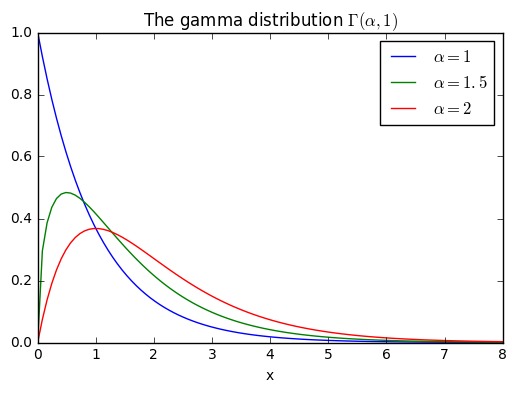

In [2]:
x = np.linspace(0,8,100)
for a in [1,1.5,2]:
    plt.plot(x, x**(a-1)*np.exp(-x)/ sp.gamma(a), label="$\\alpha="+str(a)+"$")
plt.legend()
plt.xlabel("x")
plt.title("The gamma distribution $\Gamma(\\alpha,1)$");

In order to sample this with the rejection sampling, we need an _instrumental distribution_. We assume we know how to draw samples from the instrumental distribution. We choose the general **exponential distribution**, with the density

$$ q_\lambda (x) = \lambda \mathrm{e}^{-\lambda x}$$

In order to maximize the acceptance probability (see lecture notes), we choose $\lambda = 1/\alpha$.

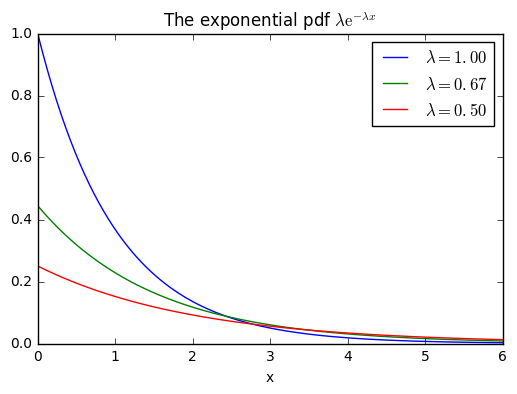

In [117]:
from scipy.stats import expon
for a in [1,1.5,2]:
    plt.plot(x,(1.0/a)* expon.pdf(x, scale = 1/(1.0/a)), label="$\\lambda=%.2f$" % (1.0/a,))
plt.legend()
plt.xlabel("x")
plt.title("The exponential pdf $\lambda\mathrm{e}^{-\lambda x}$");

Here's the main loop of rejection sampling, to retrieve one random value.

In [45]:
def p(x):
    return x**(a-1)*np.exp(-x)/sp.gamma(a)
def q(x, lam):
    return lam * np.exp(-lam*x)

a = 2.0
lam = 1/a
M = (a**a) * np.exp(-(a-1))/sp.gamma(a)
while True:
    x = expon.rvs(scale=1.0/a)
    u = np.random.uniform()
    if u <= p(x)/(M*q(x,lam)):
        print x
        break


0.398340353921


In [97]:
def rejsamp(n=1):
    retval = []
    ntrials = 0
    for i in range(n):
        while True:
            x = expon.rvs(scale=1/lam)
            u = np.random.uniform()
            ntrials += 1
            if u <= p(x)/(M*q(x,lam)):
                retval.append(x)
                break
    return ntrials, retval

In [100]:
a = 2.0
lam = 1/a
M = ((a-1)/(1-lam))**(a-1) * np.exp(-(a-1))/(lam*sp.gamma(a))
ntrials, outcomes = rejsamp(100000)

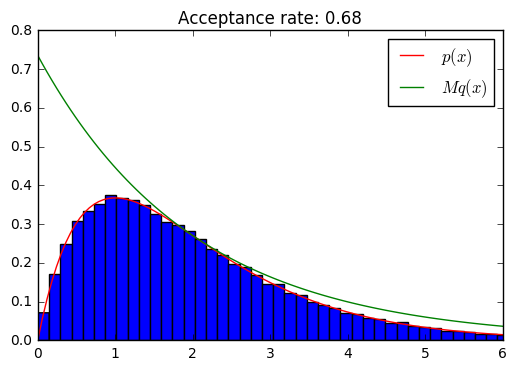

In [101]:
plt.hist(outcomes,bins=100, normed=True);
x = np.linspace(0,6,100)
plt.plot(x,p(x),"r", label="$p(x)$");
plt.plot(x,M*q(x,lam),"g", label="$Mq(x)$");
plt.xlim(0,6);
plt.legend();
plt.title("Acceptance rate: %.2f" % (1.0*len(outcomes)/ntrials,));

In [103]:
1/M

0.67957045711476127

In [107]:
a = 2.0
lam = 0.1
M = ((a-1)/(1-lam))**(a-1) * np.exp(-(a-1))/(lam*sp.gamma(a))

In [108]:
ntrials, outcomes = rejsamp(10000)

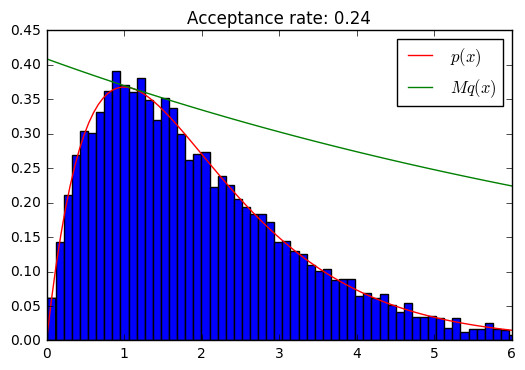

In [109]:
plt.hist(outcomes,bins=100, normed=True);
x = np.linspace(0,6,100)
plt.plot(x,p(x),"r", label="$p(x)$");
plt.plot(x,M*q(x,lam),"g", label="$Mq(x)$");
plt.xlim(0,6);
plt.legend();
plt.title("Acceptance rate: %.2f" % (1.0*len(outcomes)/ntrials,))

In [113]:
a = 2.0
lam = 0.7
M = ((a-1)/(1-lam))**(a-1) * np.exp(-(a-1))/(lam*sp.gamma(a))

In [114]:
ntrials, outcomes = rejsamp(10000)

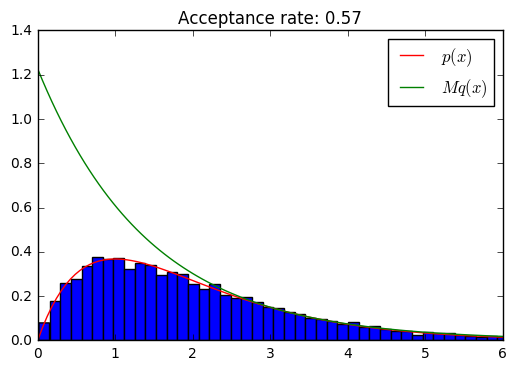

In [116]:
plt.hist(outcomes,bins=100, normed=True);
x = np.linspace(0,6,100)
plt.plot(x,p(x),"r", label="$p(x)$");
plt.plot(x,M*q(x,lam),"g", label="$Mq(x)$");
plt.xlim(0,6);
plt.legend();
plt.title("Acceptance rate: %.2f" % (1.0*len(outcomes)/ntrials,));